##Team Membes:

1.   Mahesh Ramesh Chavan
2.   Sourav Prakash Rathod
3.   Kishan Atulbhai Vyas
4.   Swamini Sanjay Thorat

In [2]:
import pandas as pd
import numpy as np

In [2]:
tornado_data = pd.read_csv("https://raw.githubusercontent.com/Dong-UTIL/Natural-Hazards-Twitter-Dataset/master/2011Tornado_Summary.csv")
Sandy_data = pd.read_csv("https://raw.githubusercontent.com/Dong-UTIL/Natural-Hazards-Twitter-Dataset/master/2012Sandy_Summary.csv")
floods_data = pd.read_csv("https://raw.githubusercontent.com/Dong-UTIL/Natural-Hazards-Twitter-Dataset/master/2013Floods_Summary.csv")
blizzard_data = pd.read_csv("https://raw.githubusercontent.com/Dong-UTIL/Natural-Hazards-Twitter-Dataset/master/2016Blizzard_Summary.csv")
mathew_data = pd.read_csv("https://raw.githubusercontent.com/Dong-UTIL/Natural-Hazards-Twitter-Dataset/master/2016Matthew_Summary.csv")
hurricane_data = pd.read_csv("https://raw.githubusercontent.com/Dong-UTIL/Natural-Hazards-Twitter-Dataset/master/2017Hurricane_Summary.csv")
michael_data = pd.read_csv("https://raw.githubusercontent.com/Dong-UTIL/Natural-Hazards-Twitter-Dataset/master/2018Michael_Summary.csv")
wildfires_data = pd.read_csv("https://raw.githubusercontent.com/Dong-UTIL/Natural-Hazards-Twitter-Dataset/master/2018Wildfires_Summary.csv")
dorian_data = pd.read_csv("https://raw.githubusercontent.com/Dong-UTIL/Natural-Hazards-Twitter-Dataset/master/2019Dorian_Summary.csv")

In [3]:
tornado_data.tail()

,num,text,timestamp,label
3567,39,Thanks to @BarackObama and @SethMeyers21 for m...,40664.134028,0
3568,0,Stamford-based AmeriCares is preparing to send...,40663.670139,0
3569,2,Semi-trailer parked at People's Church Spring ...,40662.943750,0
3570,3,RT @TopNoTcH_B1tch: My mom is goin out of town...,40662.732639,0
3571,6,Volunteers Offer Support to Southern Tornado V...,40664.518056,0


In [4]:
tornado_data["label"] = tornado_data['label'].replace(to_replace = 1, value = "Tornado")
tornado_data["label"] = tornado_data['label'].replace(to_replace = 0, value = "Normal")

In [5]:
tornado_data.head()

,num,text,timestamp,label
0,0,RT @uberdogfound: Please RT - Food needed for ...,40657.975000,Tornado
1,1,Please RT - Food needed for shelter in NC in a...,40657.975000,Tornado
2,3,‚ô°its raining and tornado warnings....about t...,40657.897917,Tornado
3,9,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,40657.766667,Tornado
4,10,Saved by the tornado warning....I'm just ready...,40657.756250,Normal


In [6]:
Sandy_data["label"] = Sandy_data['label'].replace(to_replace = 1, value = "Sandy")
Sandy_data["label"] = Sandy_data['label'].replace(to_replace = 0, value = "Normal")

In [7]:
floods_data["label"] = floods_data['label'].replace(to_replace = 1, value = "Floods")
floods_data["label"] = floods_data['label'].replace(to_replace = 0, value = "Normal")

In [8]:
blizzard_data["label"] = blizzard_data['label'].replace(to_replace = 1, value = "Blizzard")
blizzard_data["label"] = blizzard_data['label'].replace(to_replace = 0, value = "Normal")

In [9]:
mathew_data["label"] = mathew_data['label'].replace(to_replace = 1, value = "Mathew")
mathew_data["label"] = mathew_data['label'].replace(to_replace = 0, value = "Normal")

In [10]:
hurricane_data["label"] = hurricane_data['label'].replace(to_replace = 1, value = "Hurricane")
hurricane_data["label"] = hurricane_data['label'].replace(to_replace = 0, value = "Normal")

In [11]:
michael_data["sentiment"] = michael_data['sentiment'].replace(to_replace = 1, value = "Michael")
michael_data["sentiment"] = michael_data['sentiment'].replace(to_replace = 0, value = "Normal")

In [12]:
wildfires_data["label"] = wildfires_data['label'].replace(to_replace = 1, value = "Wildfires")
wildfires_data["label"] = wildfires_data['label'].replace(to_replace = 0, value = "Normal")

In [13]:
dorian_data["label"] = dorian_data['label'].replace(to_replace = 1, value = "Dorian")
dorian_data["label"] = dorian_data['label'].replace(to_replace = 0, value = "Normal")

In [14]:
Data = pd.concat([tornado_data, Sandy_data, floods_data, blizzard_data, mathew_data, hurricane_data, michael_data, wildfires_data, dorian_data])

In [15]:
Data['label'].value_counts()

Normal       9565
Dorian       5675
Hurricane    4644
Wildfires    4263
Mathew       3563
Blizzard     3341
Floods       2711
Tornado      2516
Sandy        1493
Name: label, dtype: int64

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

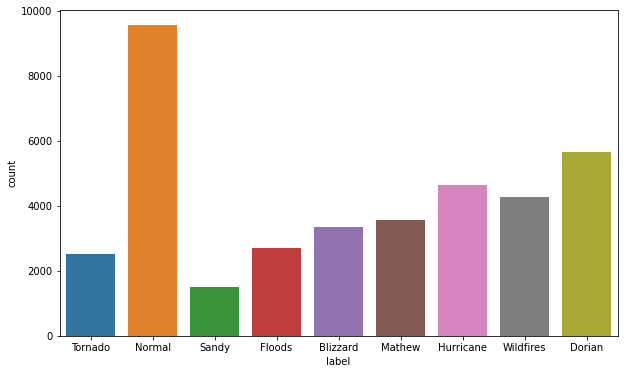

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x= Data['label'])

In [5]:
from wordcloud import WordCloud, STOPWORDS

In [20]:
df = Data[Data['label'] != "Normal"]
df.head()

,num,text,timestamp,label,Unnamed: 0,sentiment
0,0.0,RT @uberdogfound: Please RT - Food needed for ...,40657.975,Tornado,NaN,NaN
1,1.0,Please RT - Food needed for shelter in NC in a...,40657.975,Tornado,NaN,NaN
2,3.0,‚ô°its raining and tornado warnings....about t...,40657.897917,Tornado,NaN,NaN
3,9.0,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,40657.766667,Tornado,NaN,NaN
5,12.0,uh...no more food please Mr. @mlp_spike ..my t...,40657.657639,Tornado,NaN,NaN


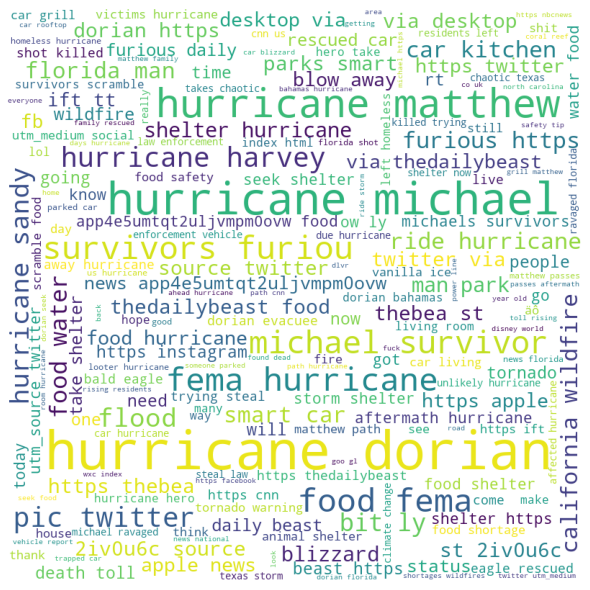

In [21]:
#df = df['text']

comment_words = ''
stopwords = set(STOPWORDS)
 
for val in df.text:
     
    val = str(val)
 
    tokens = val.split()
     
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [6]:
import nltk
from nltk.corpus import stopwords

In [23]:
Data['text'].iloc[3]

"Lmao #damn RT @LuCeCaNNoNn: If I don't get any food I hope the tornado blow all yall food out yall mouth #SoIDC"

In [24]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

temp = []

for row in range(len(Data['text'])):

  tokens = nltk.wordpunct_tokenize(Data['text'].iloc[row])
  text = nltk.Text(tokens)
  words = [wrd.lower() for wrd in text if wrd.isalpha()]
  
  list = ' '.join(word for word in words)

  stop_words = set(stopwords.words('english'))
  tweet = list
  word_tokens = word_tokenize(tweet)
  
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  
  filtered_sentence = []
  
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  list2 = ' '.join(word2 for word2 in filtered_sentence)
  temp.append(list2)

Data['without_stopwords'] = temp

In [25]:
Data.head()

,num,text,timestamp,label,Unnamed: 0,sentiment,without_stopwords
0,0.0,RT @uberdogfound: Please RT - Food needed for ...,40657.975,Tornado,NaN,NaN,rt uberdogfound please rt food needed shelter ...
1,1.0,Please RT - Food needed for shelter in NC in a...,40657.975,Tornado,NaN,NaN,please rt food needed shelter nc area hit hard...
2,3.0,‚ô°its raining and tornado warnings....about t...,40657.897917,Tornado,NaN,NaN,ô raining tornado warnings coma eating food òª òª
3,9.0,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,40657.766667,Tornado,NaN,NaN,lmao damn rt lucecannonn get food hope tornado...
4,10.0,Saved by the tornado warning....I'm just ready...,40657.75625,Normal,NaN,NaN,saved tornado warning ready eat good food


In [26]:
Data.drop(['Unnamed: 0', 'sentiment'], axis = 1, inplace = True)
Data.head()

,num,text,timestamp,label,without_stopwords
0,0.0,RT @uberdogfound: Please RT - Food needed for ...,40657.975,Tornado,rt uberdogfound please rt food needed shelter ...
1,1.0,Please RT - Food needed for shelter in NC in a...,40657.975,Tornado,please rt food needed shelter nc area hit hard...
2,3.0,‚ô°its raining and tornado warnings....about t...,40657.897917,Tornado,ô raining tornado warnings coma eating food òª òª
3,9.0,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,40657.766667,Tornado,lmao damn rt lucecannonn get food hope tornado...
4,10.0,Saved by the tornado warning....I'm just ready...,40657.75625,Normal,saved tornado warning ready eat good food


In [7]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
import string 

In [31]:
nlp = spacy.load('en')
lmtzr = WordNetLemmatizer()

In [34]:
def text_preprocess(text):
    lm = []
    text = nlp(text)
    for token in text:
        lm.append(token.lemma_)
        
    text = " ".join(lm)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [35]:
Data['processed'] = Data['without_stopwords'].apply(text_preprocess)

In [36]:
Data.head()

,num,text,timestamp,label,without_stopwords,processed
0,0.0,RT @uberdogfound: Please RT - Food needed for ...,40657.975,Tornado,rt uberdogfound please rt food needed shelter ...,rt uberdogfound please rt food need shelter nc...
1,1.0,Please RT - Food needed for shelter in NC in a...,40657.975,Tornado,please rt food needed shelter nc area hit hard...,please rt food need shelter nc area hit hard t...
2,3.0,‚ô°its raining and tornado warnings....about t...,40657.897917,Tornado,ô raining tornado warnings coma eating food òª òª,ô rain tornado warning coma eat food òª òª
3,9.0,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,40657.766667,Tornado,lmao damn rt lucecannonn get food hope tornado...,lmao damn rt lucecannonn get food hope tornado...
4,10.0,Saved by the tornado warning....I'm just ready...,40657.75625,Normal,saved tornado warning ready eat good food,save tornado warning ready eat good food


In [37]:
Data.to_csv("NLP_Data.csv")

In [3]:
Data = pd.read_csv("/content/NLP_Data.csv")
Data.head()

,Unnamed: 0,num,text,timestamp,label,without_stopwords,processed
0,0,0.0,RT @uberdogfound: Please RT - Food needed for ...,40657.975,Tornado,rt uberdogfound please rt food needed shelter ...,rt uberdogfound please rt food need shelter nc...
1,1,1.0,Please RT - Food needed for shelter in NC in a...,40657.975,Tornado,please rt food needed shelter nc area hit hard...,please rt food need shelter nc area hit hard t...
2,2,3.0,‚ô°its raining and tornado warnings....about t...,40657.8979166667,Tornado,ô raining tornado warnings coma eating food òª òª,ô rain tornado warning coma eat food òª òª
3,3,9.0,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,40657.7666666667,Tornado,lmao damn rt lucecannonn get food hope tornado...,lmao damn rt lucecannonn get food hope tornado...
4,4,10.0,Saved by the tornado warning....I'm just ready...,40657.75625,Normal,saved tornado warning ready eat good food,save tornado warning ready eat good food


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
LE = LabelEncoder()
LE.fit(Data['label'])
Data['Updatedlabel'] = LE.transform(Data['label'])

In [6]:
df = Data[['Updatedlabel', 'processed']]
df.head()

,Updatedlabel,processed
0,7,rt uberdogfound please rt food need shelter nc...
1,7,please rt food need shelter nc area hit hard t...
2,7,ô rain tornado warning coma eat food òª òª
3,7,lmao damn rt lucecannonn get food hope tornado...
4,5,save tornado warning ready eat good food


In [7]:
x = df[['processed']]
y = df[['Updatedlabel']]

In [8]:
x

,processed
0,rt uberdogfound please rt food need shelter nc...
1,please rt food need shelter nc area hit hard t...
2,ô rain tornado warning coma eat food òª òª
3,lmao damn rt lucecannonn get food hope tornado...
4,save tornado warning ready eat good food
...,...
41993,bahamian rescue victim hurricane dorian jet sk...
41994,bahamian rescue victim hurricane dorian jet sk...
41995,hurricane dorian ravage bahamas cry internatio...
41996,bahamians rescue victim hurricane dorian jet s...


In [9]:
from imblearn.under_sampling import RandomUnderSampler

In [10]:
undersample = RandomUnderSampler(random_state=42)

In [11]:
x_under, y_under = undersample.fit_resample(x, y)

In [12]:
x_under

,processed
0,woman afraid drive blizzard find dead car park...
1,menu blizzard digiorno oreo mozzarella stick a...
2,blizzard protip clean snow roof car cause vehi...
3,get ready blizzard age stalk east coast weeken...
4,brave blizzard find food rip
...,...
14925,hurricane michael looter shoot try steal fire ...
14926,food fema hurricane michael survivors furious ...
14927,comment victim hurricane michael get food wate...
14928,bad disaster jackson county ever see say one o...


In [13]:
y_under

,Updatedlabel
0,0
1,0
2,0
3,0
4,0
...,...
14925,9
14926,9
14927,9
14928,9


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer()

In [15]:
processed  = vectorizer.fit_transform(x_under['processed']) 

In [16]:
processed

<14930x18296 sparse matrix of type '<class 'numpy.float64'>'
	with 219418 stored elements in Compressed Sparse Row format>

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(processed, y_under['Updatedlabel'], test_size=0.2)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11944, 18296), (2986, 18296), (11944,), (2986,))

## Logistic Regression & MultinomialNB

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [49]:
Logistic_model = LogisticRegression(solver='liblinear', penalty='l1')
MNB = MultinomialNB()

In [51]:
print(Logistic_model.fit(X_train, y_train))
print(MNB.fit(X_train, y_train))

LogisticRegression(penalty='l1', solver='liblinear')
MultinomialNB()


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score

def conf_matrix_acc(y_true, y_pred):
    print(f'Confusion matrix\n:{confusion_matrix(y_true, y_pred)}\n')
    print(f'Accuracy score is : {accuracy_score(y_true, y_pred)}')

In [53]:
y_pred_lr = Logistic_model.predict(X_test)
y_pred_mnb = MNB.predict(X_test)

In [54]:
conf_matrix_acc(y_test,y_pred_lr )
conf_matrix_acc(y_test, y_pred_mnb)

Confusion matrix
:[[299   0   0   0   0   0   0   0   0   0]
 [  0 300   0   0   0   5   0   0   0   0]
 [  0   0 318   1   0   2   1   1   0   0]
 [  0   0   3 278   3  11   1   0   0   0]
 [  0   0   0   1 288   0   0   0   0   0]
 [ 10  22  31  72  21  84  16  32   8   0]
 [  0   0   0   0   0   0 288   0   0   0]
 [  0   0   0   0   0   1   0 312   0   0]
 [  0   0   3   3   0   2   0   0 298   1]
 [  0   0   0   0   0   0   0   0   0 270]]

Accuracy score is : 0.9159410582719357
Confusion matrix
:[[286   0   3   1   2   1   3   1   2   0]
 [  1 280   0   3   2  16   1   1   0   1]
 [  5   4 261  13   1  22   5   6   4   2]
 [  4  11   7 225   1  18  16   5   6   3]
 [  1   7   1   9 247  16   4   0   1   3]
 [ 17  21  18  32  27 121  26  24  10   0]
 [  2   3   0   4   0  11 268   0   0   0]
 [  0   2   4   3   0  13   0 290   1   0]
 [  8   0   2   2   0   8   1   0 286   0]
 [  1  11   2   1   0  11   6   3   4 231]]

Accuracy score is : 0.8355659745478902


## Neural Network

In [19]:
import tensorflow as tf

In [20]:
X_arr = X_train.toarray()

In [48]:
NN = tf.keras.Sequential([
  tf.keras.layers.Dense(16, input_shape = (18296,), activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.Dense(64, activation = 'relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [49]:
NN.compile(optimizer = 'Adam',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics = ['accuracy'])

In [50]:
NN.fit(X_arr, y_train, epochs = 13)

Epoch 1/13
374/374 [==============================] - 3s 8ms/step - loss: 1.7675 - accuracy: 0.4741
Epoch 2/13
374/374 [==============================] - 3s 7ms/step - loss: 0.7371 - accuracy: 0.8035
Epoch 3/13
374/374 [==============================] - 3s 7ms/step - loss: 0.4343 - accuracy: 0.8788
Epoch 4/13
374/374 [==============================] - 3s 8ms/step - loss: 0.3176 - accuracy: 0.9102
Epoch 5/13
374/374 [==============================] - 3s 8ms/step - loss: 0.2548 - accuracy: 0.9266
Epoch 6/13
374/374 [==============================] - 3s 8ms/step - loss: 0.2106 - accuracy: 0.9393
Epoch 7/13
374/374 [==============================] - 3s 8ms/step - loss: 0.1797 - accuracy: 0.9478
Epoch 8/13
374/374 [==============================] - 3s 8ms/step - loss: 0.1519 - accuracy: 0.9557
Epoch 9/13
374/374 [==============================] - 3s 8ms/step - loss: 0.1318 - accuracy: 0.9612
Epoch 10/13
374/374 [==============================] - 3s 7ms/step - loss: 0.1129 - accuracy: 0.9674

In [31]:
X_test_arr = X_test.toarray()

In [51]:
NN.evaluate(X_test_arr, y_test)

94/94 [==============================] - 0s 3ms/step - loss: 0.3654 - accuracy: 0.9015


[0.3654014468193054, 0.9015405178070068]

## PassiveAggressiveClassifier

In [56]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

In [57]:
linear_clf.fit(X_train, y_train)

PassiveAggressiveClassifier()

In [61]:
linear_clf.score(X_train, y_train)

0.9988278633623576

In [58]:
y_pred=linear_clf.predict(X_test)

In [59]:
#Test data accuracy
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.9115874079035499

## Conclusion

We have used Logistic Regression, MultinomialNB, Neural Network and PassiveAggressiveClassifier based on the evaluation of these models we can say that PassiveAggressiveClassifier and Logistic Regression gives better accuracy on test data as compared to other two models.